<a href="https://colab.research.google.com/github/aramakrishnan-006/pytorch-notebooks/blob/main/pytorch_linear_classification_withLogits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [75]:
#Importing the Breast Cancer dataset from Sklearn
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [76]:
type(data)

sklearn.utils._bunch.Bunch

In [77]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [78]:
#Checking Shape
data.data.shape
#The output of this will show that there are 30 features and 569 samples

(569, 30)

In [79]:
#The target here is just '0' or '1. If you have 'm' targets then they would be labelled 0.... m - 1

data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [80]:
#Target Names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [81]:
data.target.shape

(569,)

In [82]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [83]:
#Splittling the data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.7)
N, D = X_train.shape

In [84]:
#Standardization of the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
#Build the Model
model = nn.Sequential(nn.Linear(D, 1), nn.Sigmoid())

#Loss & Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())


In [86]:
#Convert to Torch Tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [87]:
#training the Model

epochs = 500

train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)

for i in range(epochs):
  optimizer.zero_grad()

  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  #backward
  loss.backward()
  optimizer.step()

  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  train_losses[i] = loss.item()
  test_losses[i] = loss_test.item()

  if (i + 1) % 20 ==0:
    print(f"Epoch {i + 1}/{epochs} Train Loss: {loss.item():.4f}  Test Loss: {loss_test.item(): .4f}")



Epoch 20/500 Train Loss: 0.6894  Test Loss:  0.6494
Epoch 40/500 Train Loss: 0.6572  Test Loss:  0.6203
Epoch 60/500 Train Loss: 0.6300  Test Loss:  0.5965
Epoch 80/500 Train Loss: 0.6091  Test Loss:  0.5782
Epoch 100/500 Train Loss: 0.5934  Test Loss:  0.5644
Epoch 120/500 Train Loss: 0.5814  Test Loss:  0.5537
Epoch 140/500 Train Loss: 0.5720  Test Loss:  0.5452
Epoch 160/500 Train Loss: 0.5644  Test Loss:  0.5382
Epoch 180/500 Train Loss: 0.5581  Test Loss:  0.5324
Epoch 200/500 Train Loss: 0.5527  Test Loss:  0.5275
Epoch 220/500 Train Loss: 0.5480  Test Loss:  0.5232
Epoch 240/500 Train Loss: 0.5439  Test Loss:  0.5194
Epoch 260/500 Train Loss: 0.5403  Test Loss:  0.5161
Epoch 280/500 Train Loss: 0.5370  Test Loss:  0.5131
Epoch 300/500 Train Loss: 0.5340  Test Loss:  0.5105
Epoch 320/500 Train Loss: 0.5313  Test Loss:  0.5081
Epoch 340/500 Train Loss: 0.5288  Test Loss:  0.5060
Epoch 360/500 Train Loss: 0.5264  Test Loss:  0.5041
Epoch 380/500 Train Loss: 0.5243  Test Loss:  0.50

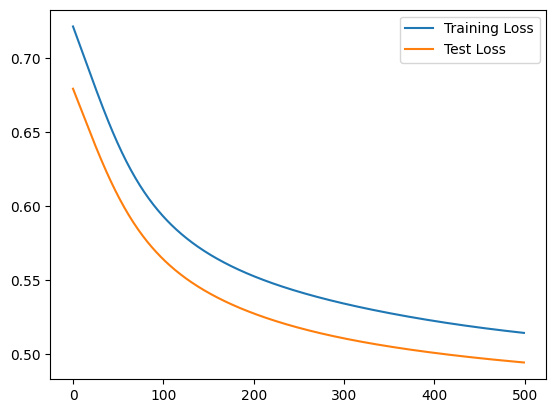

In [88]:
#Plot the Losses
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')

plt.legend()
plt.show()

In [89]:
#Accuracy

with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy() > 0)
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy() > 0)
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Training Accuracy: {train_acc:.4f} Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.5882 Test Accuracy: 0.6441


In [90]:
#State Dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4221, -0.3838, -0.1057, -0.1389, -0.1753, -0.1062, -0.3240, -0.2300,
                       -0.1652,  0.0727, -0.3815,  0.1640, -0.2241, -0.2507,  0.1658, -0.0559,
                       -0.0303, -0.3368,  0.3365,  0.1874, -0.3277, -0.3751, -0.1895, -0.2648,
                       -0.2310, -0.2649, -0.0750, -0.1711, -0.1756, -0.1335]])),
             ('0.bias', tensor([0.0041]))])

In [91]:
#Save the Model
torch.save(model.state_dict(), 'pytorch-linear-classification-model-withLogits.pt')

In [92]:
!ls


pytorch-linear-classification-model.pt		   sample_data
pytorch-linear-classification-model-withLogits.pt


In [93]:
#Loading the Model

#First create a new Model
loaded_model = nn.Sequential(nn.Linear(D, 1), nn.Sigmoid())

#Apply the keys
loaded_model.load_state_dict(torch.load('pytorch-linear-classification-model-withLogits.pt'))

<All keys matched successfully>

In [94]:
#Checking the Model

with torch.no_grad():
  p_train = loaded_model(X_train)
  p_train = np.round(p_train.numpy() > 0)
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = loaded_model(X_test)
  p_test = np.round(p_test.numpy() > 0)
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Training Accuracy: {train_acc:.4f} Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.5882 Test Accuracy: 0.6441


In [95]:
#Download the Model
#from google.colab import files
#files.download('pytorch-linear-classification-model.pt')

#Or just download from the File explorer